In [1]:
from __future__ import division, print_function, unicode_literals

# import base packages into the namespace for this program
import numpy as np
import pandas as pd
from scipy import stats
import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'
import time
import re
import math
from docx import Document

# import packages for data visulatzation 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# modeling routines from Scikit Learn packages for model develipment
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix , accuracy_score , classification_report, make_scorer,recall_score
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import regularizers

# obtain precision, recall, F1, and support metrics for model evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# specify the set of classifiers being evaluated
from sklearn.ensemble import RandomForestClassifier

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Times New Roman'

import warnings
warnings.filterwarnings("ignore")
# set KMP_DUPLICATE_LIB_OK=TRUE      #  Windows
# set up randam seed
random_seed = 55
import tensorflow as tf
import torch
import platform
# baidu translator
import json
from hashlib import md5
import random
import requests

from sklearn.impute import KNNImputer
import pickle

In [2]:
print(platform.python_version())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))  
print(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
print(torch.__version__)

3.9.12
Num GPUs Available:  1
cuda
2.1.1+cu121


In [3]:
pd.set_option('display.max_columns',100)

In [4]:
os.chdir(r"E:/CNSI_project/demo_and_data_5.0/")

In [5]:
def FileClear(top):
    for root, dirs, files in os.walk(top, topdown=False):
        for name in files:
            os.remove(os.path.join(root, name))
        for name in dirs:
            os.rmdir(os.path.join(root, name))

In [6]:
aim1_df1 = pd.read_csv('E:/CNSI_project/demo_and_data_5.0/Processed_data/MIMIC/aim1_LASSOed.csv')

In [7]:
aim1_df1.columns.tolist()

['B_pO2',
 'B_Albumin',
 'B_Creatinine',
 'B_Glucose',
 'B_H',
 'B_I',
 'B_LactateDehydrogenase',
 'B_Potassium',
 'B_Sodium',
 'B_Hemoglobin',
 'B_lymphocytes',
 'B_MCHC',
 'B_MonocytesPercentage',
 'B_Platelet',
 'B_PTT',
 'C_Glucose',
 'C_Protein',
 'B_MonocyteCount',
 'B_ImmatureGranulocytes',
 'B_RDW-SD',
 'C_Lymphs',
 'C_Macrophage',
 'C_Ploys',
 'resprate',
 'pain',
 'acuity',
 'culture']

In [8]:
df_input = aim1_df1.copy()
df_input.culture.value_counts()

0    9065
1     247
Name: culture, dtype: int64

In [9]:
# create a new folders

path3 = os.path.join(r'Processed_data/MIMIC/TrainingSet/', r'breakdowns_Transformed1')
if os.path.exists(path3) :
    FileClear(path3)
else:
    os.mkdir(path3)

In [10]:
#将转换后的数据breakdown后，再自动判断其转换是否成功。
new_cols1 = list(df_input.columns)[:-1]
for each in new_cols1:
    df_count = df_input[each].value_counts()
    df_count["空值"] = df_input.shape[0] - df_count.sum()    #同时把空值统计出来
    
    #判断是否转换成功：
    temp1 = list(df_count.index)
    i = 0
    for each1 in temp1:
        if each1 == "空值":
            continue
        elif math.isnan(pd.to_numeric(each1 , errors='coerce')):   #判断如果cell中不是数字
            i += 1
        else:
            continue
    if i == 0:
        print(each,"转换成功！")
    else:
        print(each,"的转换出了问题！")
    
    each = each.replace('/','_')
    each = each.replace('<','_')
    each = each.replace('>','_')
    #保存：
    path = os.path.join(r"./Processed_data/MIMIC/TrainingSet/breakdowns_Transformed1", each+r"_breakdown1.csv")
    df_count.to_csv(path, encoding='utf-8-sig', index = True)

B_pO2 转换成功！
B_Albumin 转换成功！
B_Creatinine 转换成功！
B_Glucose 转换成功！
B_H 转换成功！
B_I 转换成功！
B_LactateDehydrogenase 转换成功！
B_Potassium 转换成功！
B_Sodium 转换成功！
B_Hemoglobin 转换成功！
B_lymphocytes 转换成功！
B_MCHC 转换成功！
B_MonocytesPercentage 转换成功！
B_Platelet 转换成功！
B_PTT 转换成功！
C_Glucose 转换成功！
C_Protein 转换成功！
B_MonocyteCount 转换成功！
B_ImmatureGranulocytes 转换成功！
B_RDW-SD 转换成功！
C_Lymphs 转换成功！
C_Macrophage 转换成功！
C_Ploys 转换成功！
resprate 转换成功！
pain 转换成功！
acuity 转换成功！


In [11]:
df_input.groupby('culture').count()

,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,B_lymphocytes,B_MCHC,B_MonocytesPercentage,B_Platelet,B_PTT,C_Glucose,C_Protein,B_MonocyteCount,B_ImmatureGranulocytes,B_RDW-SD,C_Lymphs,C_Macrophage,C_Ploys,resprate,pain,acuity
culture,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1438,2802,8913,8648,2531,2531,2223,8839,8840,9018,5444,9016,5444,9016,5109,8646,8750,1845,1495,3252,8901,1908,8901,2466,2333,2840
1,67,55,243,242,58,58,44,243,243,246,107,246,107,246,152,218,228,42,33,88,232,71,232,88,80,100


In [12]:
df_input.groupby('culture').describe().pivot

<bound method DataFrame.pivot of           B_pO2                                                          \
          count        mean        std   min   25%    50%    75%    max   
culture                                                                   
0        1438.0  125.116134  88.278682  13.0  72.0  103.0  155.0  575.0   
1          67.0  125.208955  67.915397  37.0  83.5  106.0  155.0  386.0   

        B_Albumin                                               B_Creatinine  \
            count      mean       std  min   25%  50%  75%  max        count   
culture                                                                        
0          2802.0  3.733298  0.683222  1.2  3.30  3.8  4.2  5.8       8913.0   
1            55.0  3.480000  0.661200  2.0  2.95  3.5  4.0  5.0        243.0   

                                                      B_Glucose              \
             mean       std  min  25%  50%  75%   max     count        mean   
culture                         

In [13]:
df_input.groupby('culture').mean().pivot

<bound method DataFrame.pivot of               B_pO2  B_Albumin  B_Creatinine   B_Glucose        B_H       B_I  \
culture                                                                         
0        125.116134   3.733298      1.026949  122.109852  27.698143  0.856183   
1        125.208955   3.480000      0.921811  128.243802  39.258621  0.655172   

         B_LactateDehydrogenase  B_Potassium    B_Sodium  B_Hemoglobin  \
culture                                                                  
0                    331.031039     4.032391  138.947172     11.753992   
1                    445.045455     3.974486  138.000000     11.219512   

         B_lymphocytes     B_MCHC  B_MonocytesPercentage  B_Platelet  \
culture                                                                
0            20.810048  33.420996               6.346179  239.405723   
1            15.559813  33.351220               6.353271  278.800813   

             B_PTT  C_Glucose   C_Protein  B_MonocyteCou

In [14]:
# create a new folders

path4 = os.path.join(r'./Processed_data/MIMIC/TrainingSet/image1', r'distribution_map')
if os.path.exists(path4) :
    FileClear(path4)
else:
    os.mkdir(path4)

In [15]:
# define a function to plot distribution of data on CPR label subgroups

def plot_distribution(data_select, size_bin) :    
    g = sns.FacetGrid(df_input, hue="culture", palette="Set1")
    g = g.map(sns.distplot, data_select, bins=size_bin, hist=False, rug=True)
    g.add_legend()
    
    # 保存高清图像
    data_select = data_select.replace('/','_')
    data_select = data_select.replace('<','_')
    data_select = data_select.replace('>','_')
    file_path = os.path.join(path4, str(data_select)+'.jpeg')
    g.savefig(file_path, dpi=500, bbox_inches='tight')

In [16]:
colname = df_input.columns
colname

Index(['B_pO2', 'B_Albumin', 'B_Creatinine', 'B_Glucose', 'B_H', 'B_I',
       'B_LactateDehydrogenase', 'B_Potassium', 'B_Sodium', 'B_Hemoglobin',
       'B_lymphocytes', 'B_MCHC', 'B_MonocytesPercentage', 'B_Platelet',
       'B_PTT', 'C_Glucose', 'C_Protein', 'B_MonocyteCount',
       'B_ImmatureGranulocytes', 'B_RDW-SD', 'C_Lymphs', 'C_Macrophage',
       'C_Ploys', 'resprate', 'pain', 'acuity', 'culture'],
      dtype='object')

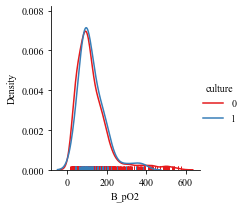

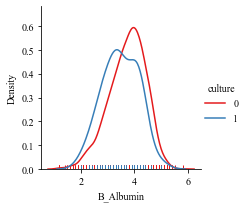

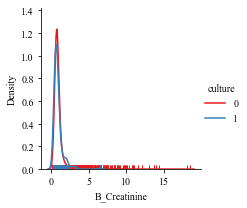

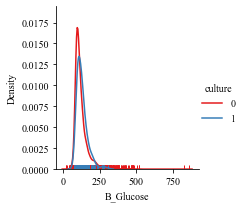

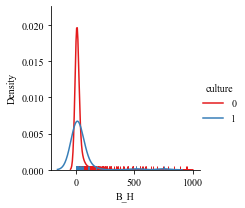

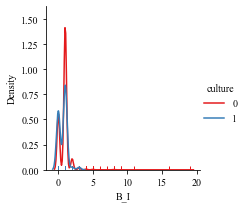

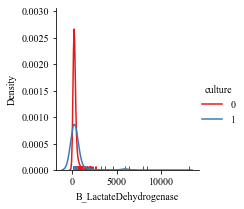

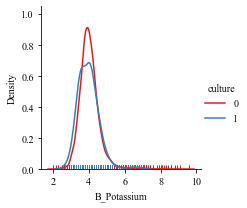

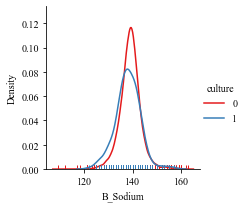

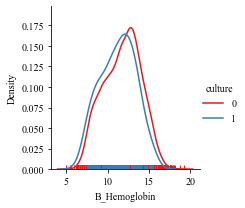

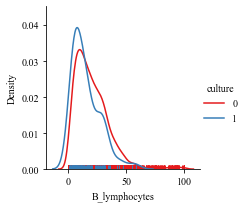

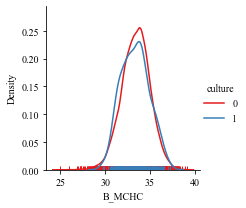

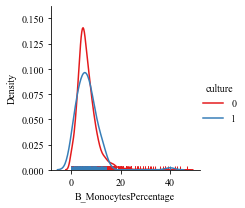

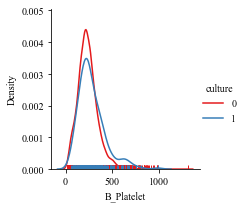

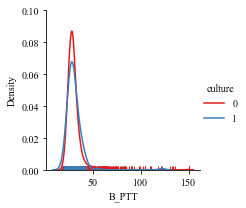

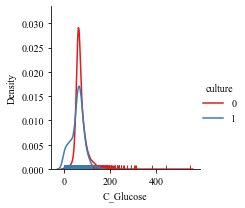

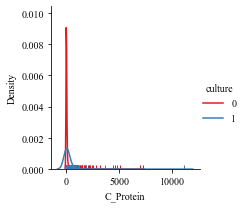

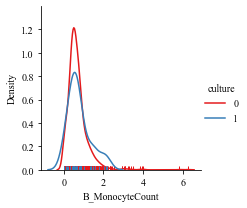

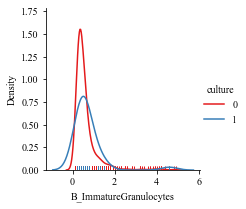

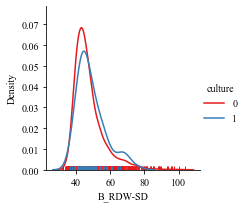

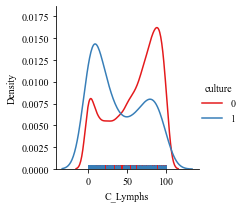

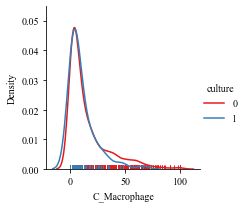

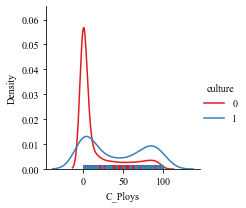

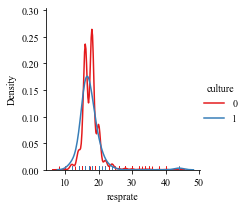

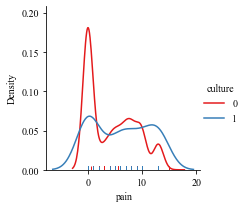

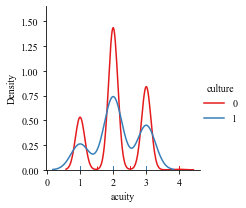

In [17]:
# feature distribution of the numerical variables on CPR labels
for col in colname[:-1]: 
    plot_distribution(col, 20)

In [18]:
# generate correlation matrix of the numerical variables 
df_input1 = df_input.drop(['culture'], 1)
#correlation
correlation = df_input1.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

In [19]:
# 新顺序调整临时cell 1，调整成自己想要的顺序
# name_order = ['age',
#                 'Gender',
#                 'Blood Gas~Blood~Glucose~50809~mg/dL',
#                 'Blood Gas~Blood~Hematocrit, Calculated~50810~%',
#                 'Blood Gas~Blood~Hemoglobin~50811~g/dL',
#                 'Blood Gas~Blood~Lactate~50813~mmol/L',
#                 'Hematology~Blood~Atypical Lymphocytes~51143~%',
#                 'Hematology~Blood~Bands~51144~%',
#                 'Hematology~Blood~Basophils~51146~%',
#                 'Hematology~Blood~Eosinophils~51200~%',
#                 'Hematology~Blood~Metamyelocytes~51251~%',
#                 'Hematology~Blood~Monocytes~51254~%',
#                 'Hematology~Blood~Myelocytes~51255~%',
#                 'Chemistry~Cerebrospinal Fluid~Glucose, CSF~51790~mg/dL',
#                 'Chemistry~Cerebrospinal Fluid~Lactate Dehydrogenase, CSF~51795~IU/L',
#                 'Chemistry~Cerebrospinal Fluid~Total Protein, CSF~51802~mg/dL',
#                 'Hematology~Cerebrospinal Fluid~Atypical Lymphocytes~52221~%',
#                 'Hematology~Cerebrospinal Fluid~Bands~52223~%',
#                 'Hematology~Cerebrospinal Fluid~Basophils~52225~%',
#                 'Hematology~Cerebrospinal Fluid~Eosinophils~52256~%',
#                 'Hematology~Cerebrospinal Fluid~Lymphs~52264~%',
#                 'Hematology~Cerebrospinal Fluid~Macrophage~52266~%',
#                 'Hematology~Cerebrospinal Fluid~Monocytes~52272~%',
#                 'Hematology~Cerebrospinal Fluid~Other~52278~%',
#                 'Hematology~Cerebrospinal Fluid~Polys~52281~%',
#                 'Hematology~Cerebrospinal Fluid~RBC, CSF~52285~#/uL',
#                 'Hematology~Cerebrospinal Fluid~Total Nucleated Cells, CSF~52286~#/uL']
# df_order = df_input1[name_order]
# correlation_order = df_order.corr()
# corr_array_order = np.array(correlation_order)
# corr_array_order

In [20]:
# 为了调整顺序临时的cell 2， 对factors的名字进行调整，全名或者简写
# FullNamesList_order = ['age',
#                 'Gender',
#                 'Blood Gas~Blood~Glucose',
#                 'Blood Gas~Blood~Hematocrit, Calculated',
#                 'Blood Gas~Blood~Hemoglobin',
#                 'Blood Gas~Blood~Lactate',
#                 'Hematology~Blood~Atypical Lymphocytes',
#                 'Hematology~Blood~Bands',
#                 'Hematology~Blood~Basophils',
#                 'Hematology~Blood~Eosinophils',
#                 'Hematology~Blood~Metamyelocytes',
#                 'Hematology~Blood~Monocytes',
#                 'Hematology~Blood~Myelocytes',
#                 'Chemistry~Cerebrospinal Fluid~Glucose, CSF',
#                 'Chemistry~Cerebrospinal Fluid~Lactate Dehydrogenase, CSF',
#                 'Chemistry~Cerebrospinal Fluid~Total Protein, CSF',
#                 'Hematology~Cerebrospinal Fluid~Atypical Lymphocytes',
#                 'Hematology~Cerebrospinal Fluid~Bands',
#                 'Hematology~Cerebrospinal Fluid~Basophils',
#                 'Hematology~Cerebrospinal Fluid~Eosinophils',
#                 'Hematology~Cerebrospinal Fluid~Lymphs',
#                 'Hematology~Cerebrospinal Fluid~Macrophage',
#                 'Hematology~Cerebrospinal Fluid~Monocytes',
#                 'Hematology~Cerebrospinal Fluid~Other',
#                 'Hematology~Cerebrospinal Fluid~Polys',
#                 'Hematology~Cerebrospinal Fluid~RBC, CSF',
#                 'Hematology~Cerebrospinal Fluid~Total Nucleated Cells, CSF']
# FullNamesList_order

In [21]:
# 为了调整顺序临时的cell 3
# FullNamesList = FullNamesList_order
# corr_array= corr_array_order

In [19]:
# 这个cell和上一个cell只能保留一个
FullNamesList = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

In [20]:
# from pylab import mpl
import matplotlib as mpl
# mpl.rcParams['font.family'] = 'sans-serif'
# mpl.rcParams['font.sans-serif'] = 'NSimSun,Times New Roman'
mpl.rcParams['font.sans-serif'] = 'Times New Roman'
font = {'family': 'Times New Roman',
            'color': 'k',
            'weight': 'normal',
            'size': 25,}

In [21]:
temp1 = corr_array<-0.4
temp2 = corr_array>0.4
corr_bool = temp1 | temp2
condition = corr_bool==False
array_new = np.where(condition, corr_bool, "*")
array_new = np.where(array_new=='*', array_new, "")
array_new

array([['*', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
        '', '', '', '', '', '', '', '', '', ''],
       ['', '*', '', '', '', '', '', '', '', '*', '', '', '', '', '', '',
        '', '', '', '', '', '', '', '', '', ''],
       ['', '', '*', '', '', '', '', '', '', '', '', '', '', '', '', '',
        '', '', '', '', '', '', '', '', '', ''],
       ['', '', '', '*', '', '', '', '', '', '', '', '', '', '', '', '*',
        '', '', '', '', '', '', '', '', '', ''],
       ['', '', '', '', '*', '', '', '*', '', '', '', '', '', '', '', '',
        '', '', '', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '*', '', '', '', '', '', '', '', '', '', '',
        '', '', '', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '*', '', '', '', '', '', '', '', '', '',
        '', '', '', '', '', '', '', '', '', ''],
       ['', '', '', '', '*', '', '', '*', '', '', '', '', '', '', '', '',
        '', '', '', '', '', '', '', '', '', ''],
       ['', '', '', 

In [22]:
np.isnan(corr_array[9:10,:10])

array([[False, False, False, False, False, False, False, False, False,
        False]])

In [23]:
np.where(np.isnan(corr_array[9:10,:10]))

(array([], dtype=int64), array([], dtype=int64))

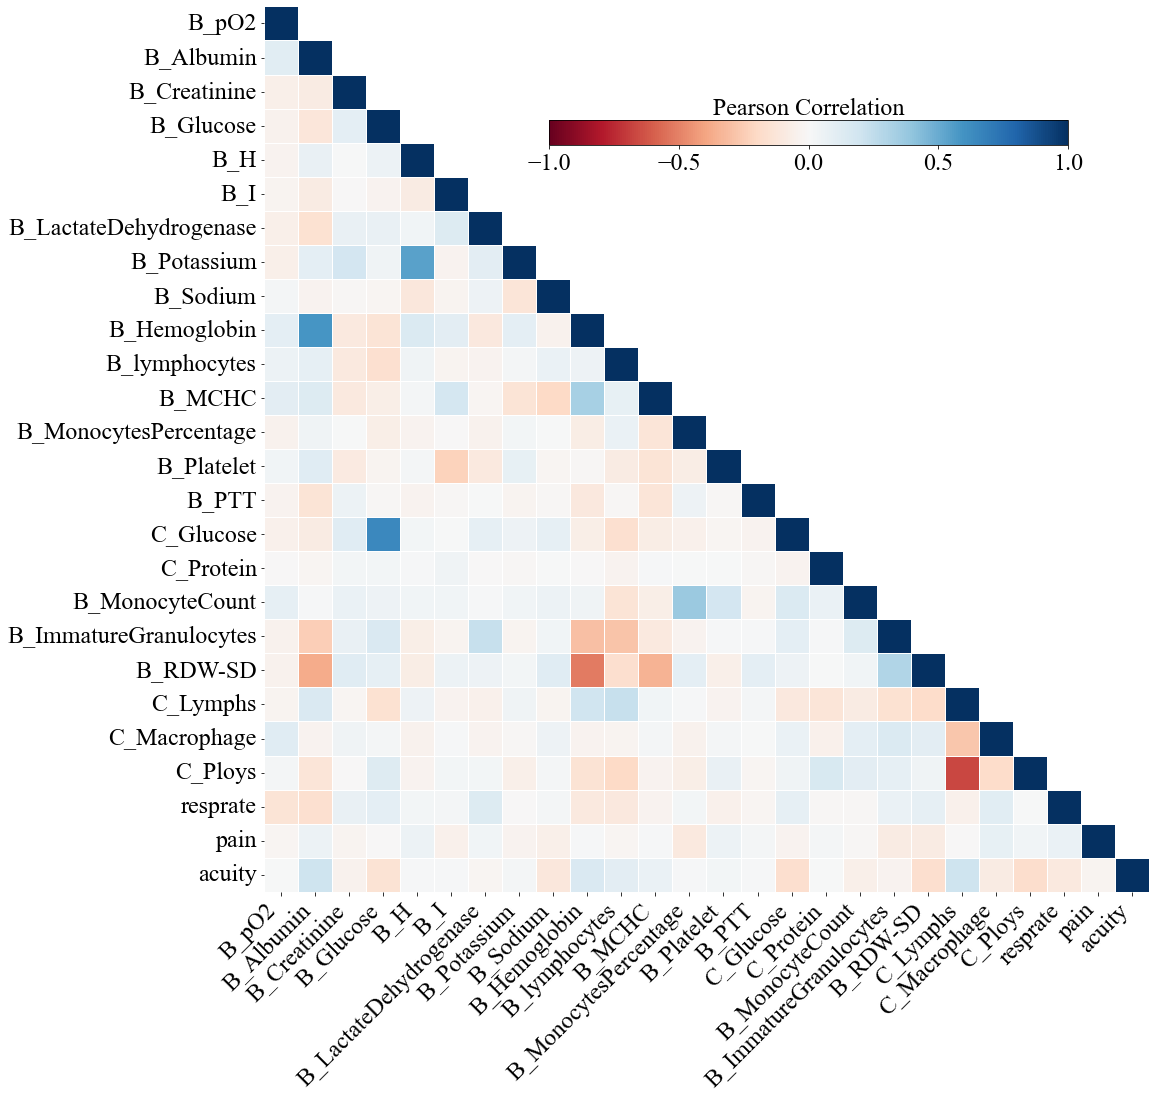

In [39]:
# 绘下三角
mask = np.ones_like(corr_array, dtype=np.bool)   # 调整zeros_like/ones_liks和下面mask的True或False一起控制上三角或下三角
mask[np.tril_indices_from(mask)] = False

fig = plt.figure(figsize=(16,16))
ax = sns.heatmap(data=corr_array, 
            cmap='RdBu',
            square=True,
            mask = mask,
            linewidths=1,
            linecolor="white",
#             annot=array_new,
            fmt='',            # 若填充的为字符，则需要这个语句
            annot_kws={"size":20},    # 填充字符的大小
            xticklabels=FullNamesList,
            yticklabels=FullNamesList,
            vmin=-1, vmax=1,  # 设置颜色条的范围为-1到1
            cbar=False,
#             cbar_kws={"shrink": 0.6, "location":'top', "use_gridspec":False},
           )
plt.xticks([i + 0.5 for i in range(len(FullNamesList))], FullNamesList, rotation = 45, fontsize=24, ha='right', fontname="Times New Roman")  # ha为文字的旋转中心
plt.yticks([i + 0.5 for i in range(len(FullNamesList))], FullNamesList, rotation = 0, fontsize=24, ha='right')

# 方法1 传统colorbar设置，需要配合sns.heatmap中的cbar_kws和cbar参数一起设置。
# cbar = ax.collections[0].colorbar
# cbar.ax.tick_params(labelsize=20)
# cbar.set_label(r'Pearson Correlation',fontdict=font)

# 方法2 自定义colorbar的位置
position = fig.add_axes([0.47, 0.85, 0.45, 0.022]) #  [距离左边距离，距离下面距离，bar的长度，bar的宽度]
cbar1 = plt.colorbar(ax.collections[0], cax=position, orientation='horizontal', )
cbar1.ax.tick_params(labelsize=24)
# cbar1.set_label(r'Pearson Correlation1',fontdict=font, loc='center')  # 文字默认在bar的下面
cbar1.ax.set_title(r'Pearson Correlation',fontdict=font, fontsize=24)   # 文字在bar的上面

# 保存高清图像
# plt.savefig('./Processed_data/MIMIC/TrainingSet/image1/Correlation_Matrix0.svg', dpi=300, bbox_inches='tight')
plt.tight_layout()   # 加上此句可能会导致图像错位。
# 保存图像为300 dpi的tiff格式
plt.savefig('E:/CNSI_project/demo_and_data_5.0/figure_in_paper/aim1/Correlation_Matrix.tif', dpi=300, format='tiff')

plt.show()

In [28]:
# # pca scatter plot using CSF testing results such as C_glu-1
# import plotly.express as px

# features = ['Chemistry~Cerebrospinal Fluid~Glucose, CSF~51790~mg/dL',
#        'Chemistry~Cerebrospinal Fluid~Total Protein, CSF~51802~mg/dL',
#        'Hematology~Cerebrospinal Fluid~Lymphs~52264~%',
#        'Hematology~Cerebrospinal Fluid~Polys~52281~%']
# new_labels = ['a','b','c','d','e']

# fig = px.scatter_matrix(
#     df_input,
#     dimensions=features,
#     color="culture",
#     opacity=0.5,
#     labels = dict(zip(features, new_labels))   # 修改x和y轴的显示
# )
# fig.update_traces(diagonal_visible=False)
# fig.show()

In [29]:
# pca scatter plot using CSF testing results such as C_glu-2

In [40]:
# from pylab import mpl
import matplotlib as mpl
# mpl.rcParams['font.family'] = 'sans-serif'
# mpl.rcParams['font.sans-serif'] = 'NSimSun,Times New Roman'
mpl.rcParams['font.sans-serif'] = 'Times New Roman'
font = {'family': 'Times New Roman',
            'color': 'k',
            'weight': 'normal',
       'size' : 25}

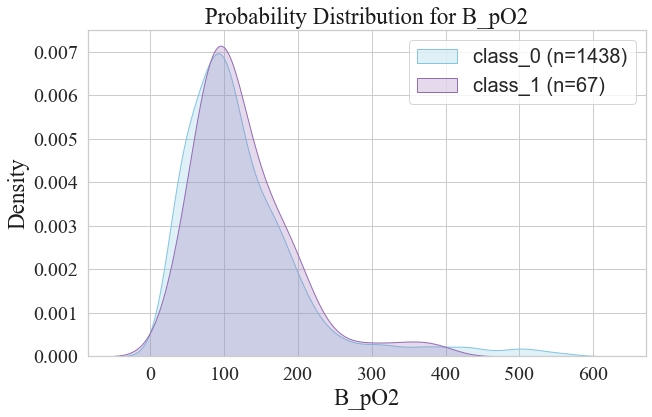

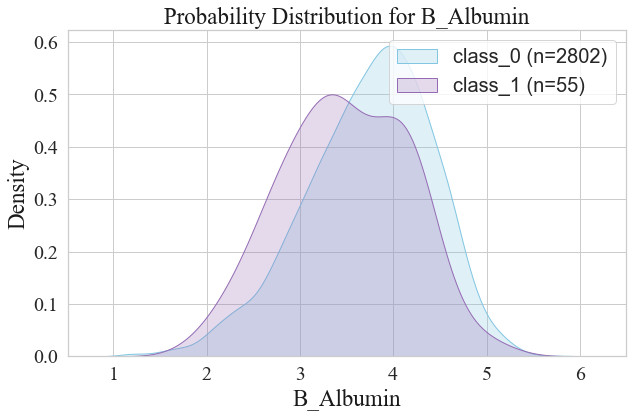

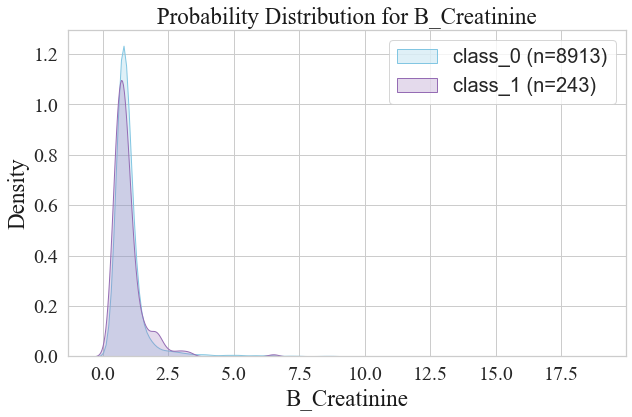

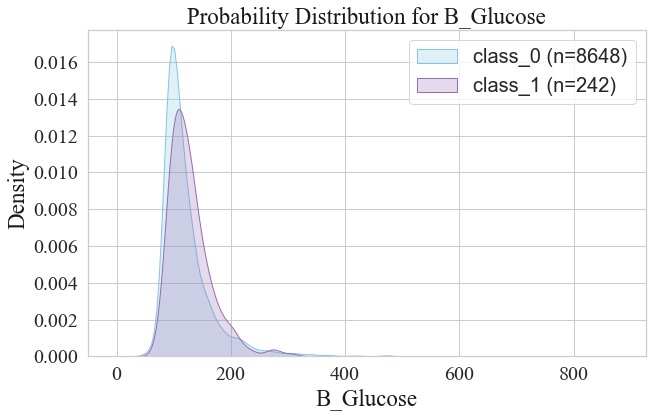

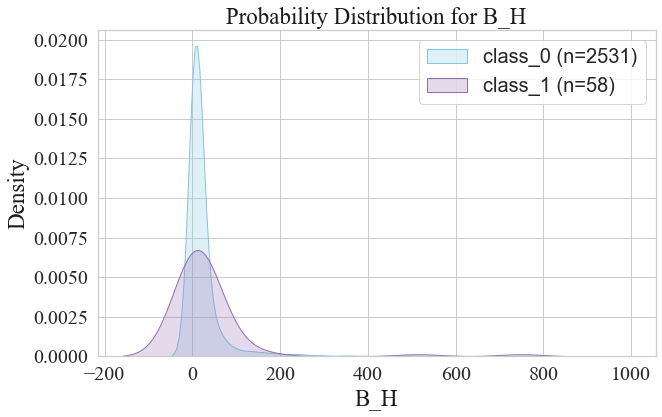

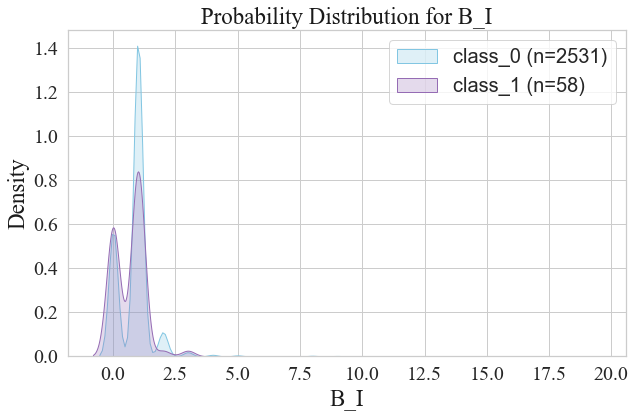

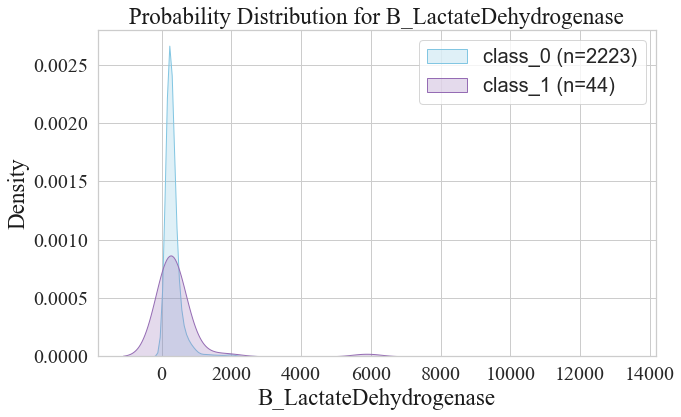

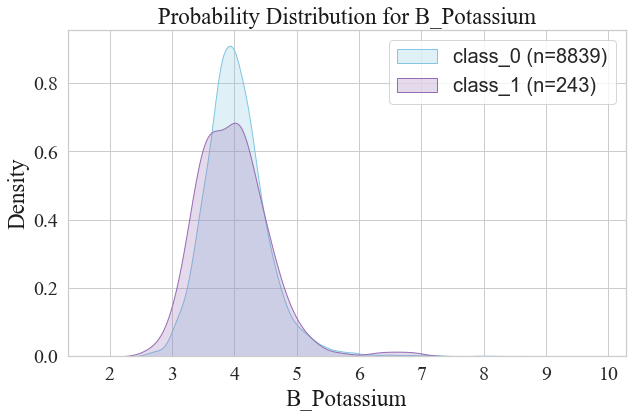

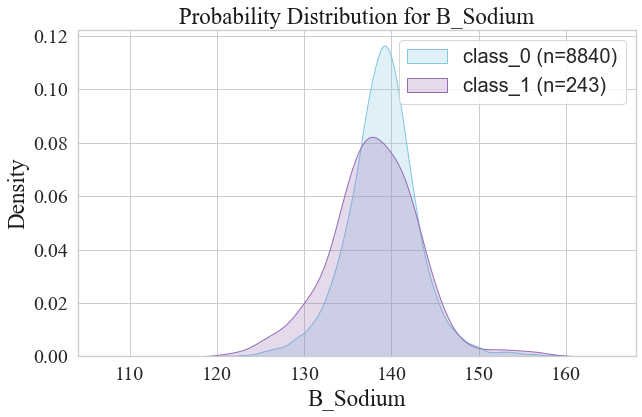

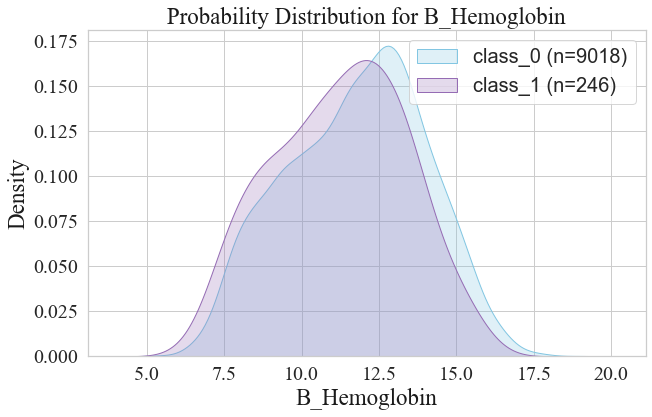

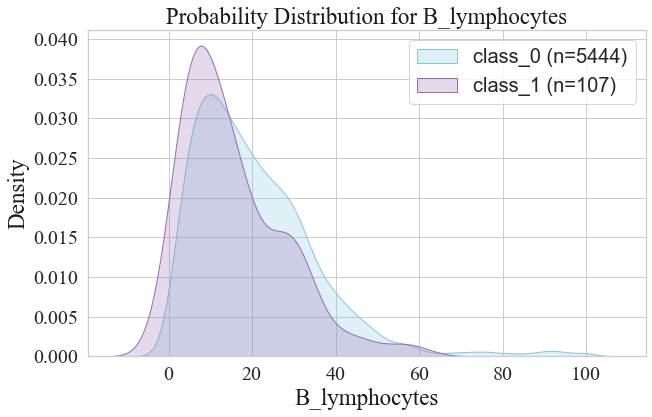

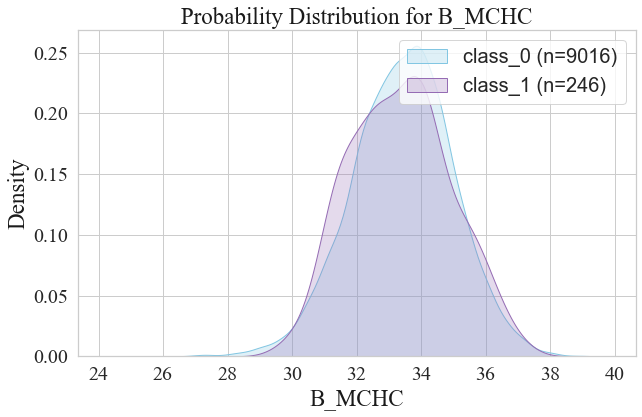

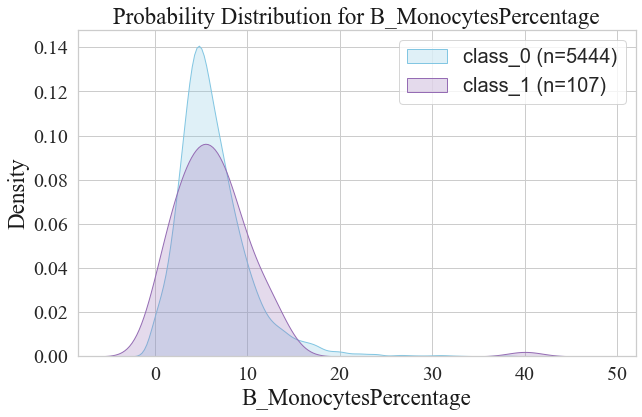

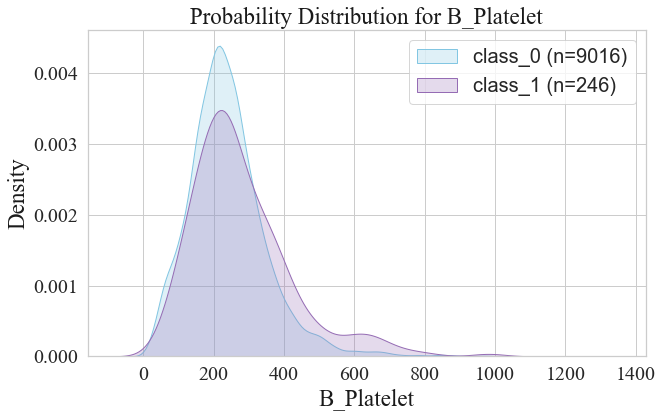

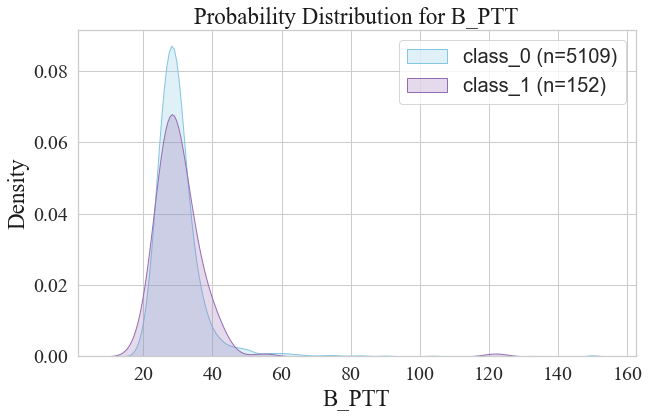

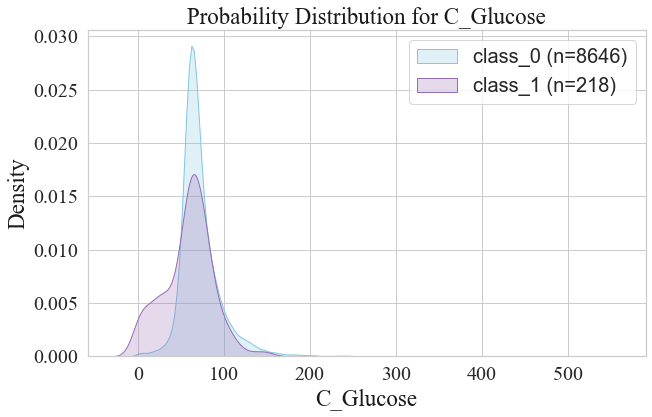

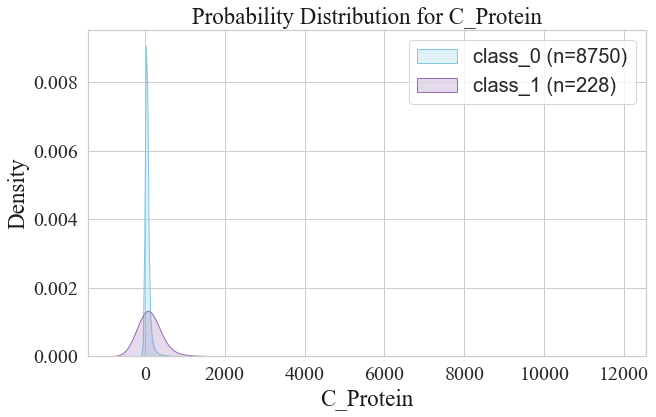

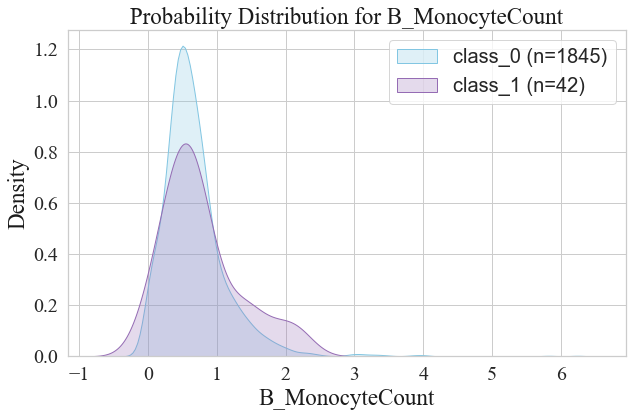

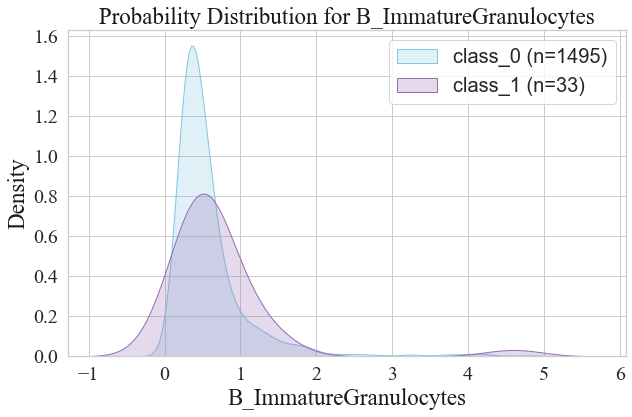

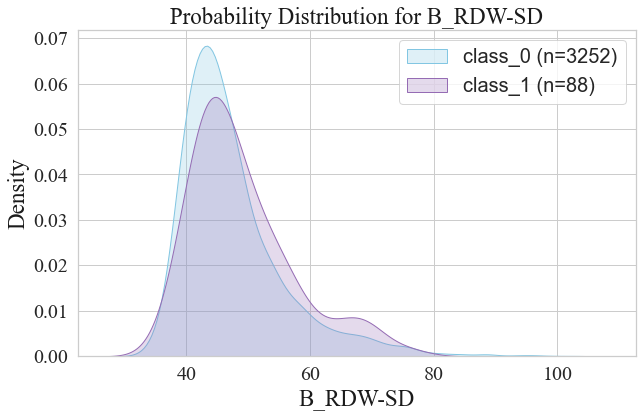

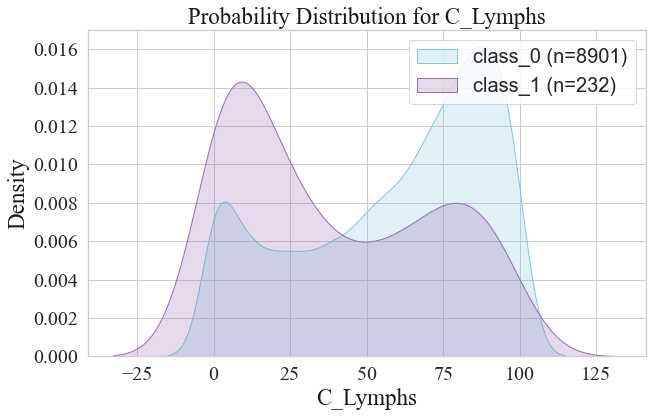

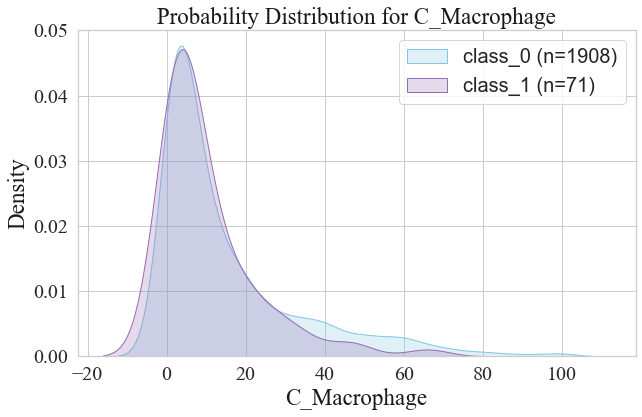

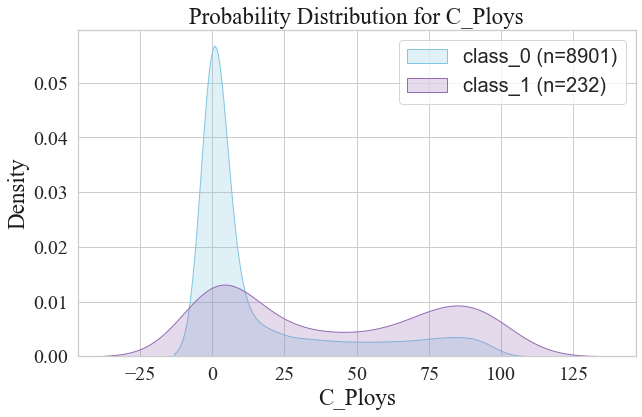

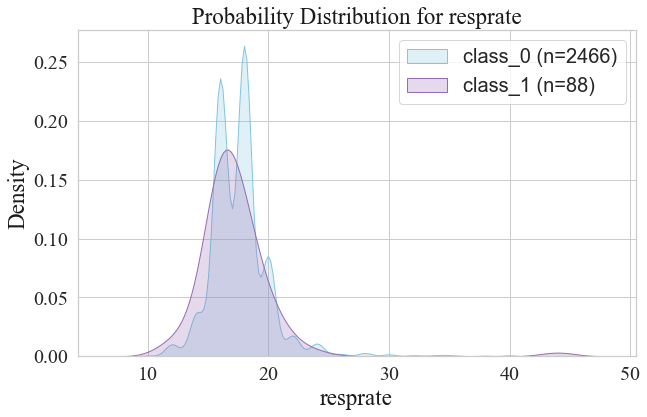

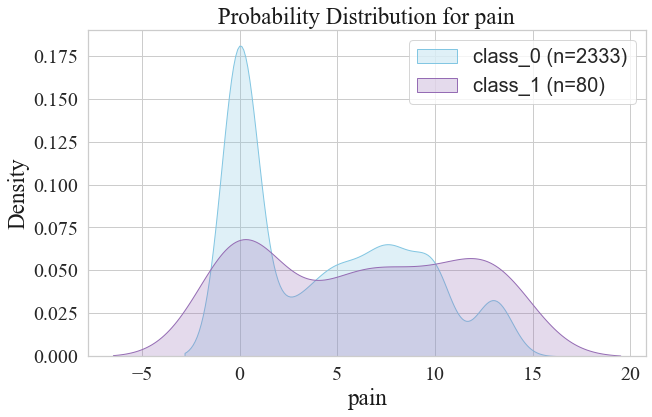

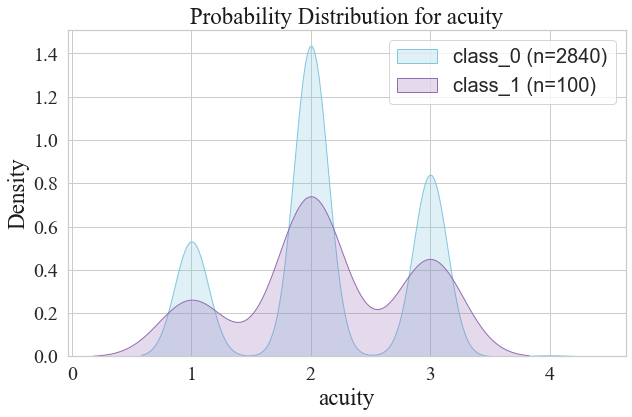

In [53]:
for i in range(df_input.shape[1]-1):
    features = df_input.columns.tolist()[i]
    grouped = df_input.groupby('culture')
    
    # 分组代码
    class_0 = grouped.get_group(0)[features].dropna()  # 删除空值
    class_1 = grouped.get_group(1)[features].dropna()  # 删除空值
    
    # 计算非空个数
    count_class_0 = class_0.count()
    count_class_1 = class_1.count()
    
    # 使用Seaborn绘制概率分布曲线
    sns.set(style="whitegrid", palette="muted")
    plt.figure(figsize=(10, 6))

    # 绘制每个类别的概率分布曲线，即使数据集为空
    def plot_with_legend(data, label, count, color):
        if count > 1:
            # 数据点超过一个，绘制 KDE 曲线
            sns.kdeplot(data, label=f'{label} (n={count})', shade=True, color=color)
        elif count == 1:
            # 只有一个数据点，绘制一个散点
            plt.scatter(data, [0], label=f'{label} (n={count})', color=color, zorder=10)
        else:
            # 没有数据点，绘制一个不可见的点，但保留颜色
            plt.plot([], [], label=f'{label} (n={count})', alpha=0, marker='o', markersize=10, color=color)

    # 根据调色板选择颜色
    colors = sns.color_palette("muted", n_colors=10)
    
    plot_with_legend(class_0, 'class_0', count_class_0, colors[9])
    plot_with_legend(class_1, 'class_1', count_class_1, colors[4])

    plt.title(f'Probability Distribution for {features}', fontdict=font, fontsize=23)  # 设置标题字体
    
    lab_event_name = str(features).replace('<', '').replace('>', '').replace('/', '')  # 移除非法字符
    
    plt.xlabel(lab_event_name, fontdict=font, fontsize=23)  # 设置X轴标签字体
    plt.ylabel('Density', fontdict=font, fontsize=23)  # 设置Y轴标签字体
    
    plt.xticks(fontsize=20, fontname='Times New Roman')  # 设置X轴刻度字体
    plt.yticks(fontsize=20, fontname='Times New Roman')  # 设置Y轴刻度字体
    
    plt.legend(fontsize=20)  # 设置图例字体
    
    # 保存图片为高清格式
#     filename = f"{lab_event_name}.png"
#     path = os.path.join("E:/CNSI_project/demo_and_data_5.0/Processed_data/MIMIC/pictures/All_features", filename)
#     plt.savefig(path, dpi=300, bbox_inches='tight')
    
    # 显示图表
    plt.show()

    # 关闭当前图形，防止重复绘制
    plt.close()

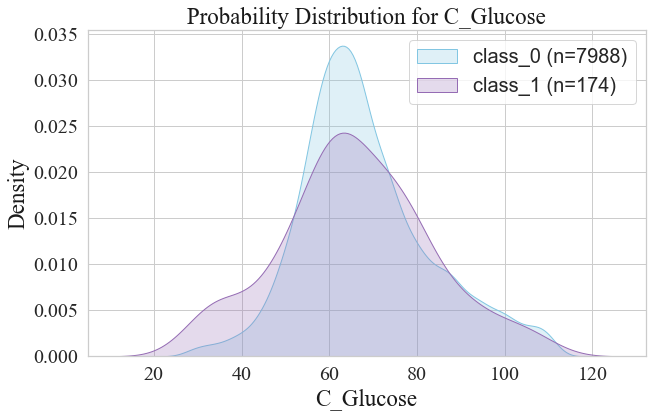

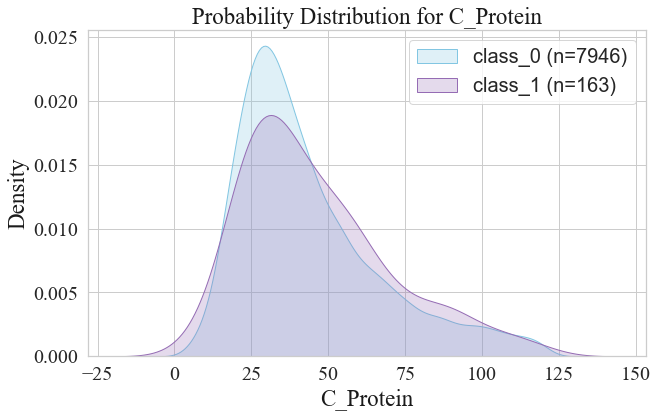

In [44]:
# 给C_Glucose和C_Protein处理异常值后再画图

# 设置全局字体大小
# plt.rcParams.update({'font.size': 25})  # 设置全局字体大小为25

# 定义一个函数来处理异常值
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

# 需要处理异常值的features
features_to_process = ['C_Glucose', 'C_Protein']

# 根据调色板选择颜色
colors = sns.color_palette("muted", n_colors=10)

for feature in features_to_process:
    # 处理异常值
    df_input_processed = remove_outliers(df_input, feature)
    
    grouped = df_input_processed.groupby('culture')
    
    class_0 = grouped.get_group(0)[feature].dropna()  # 删除空值
    class_1 = grouped.get_group(1)[feature].dropna()  # 删除空值
    
    count_class_0 = class_0.count()
    count_class_1 = class_1.count()
    
    sns.set(style="whitegrid", palette="muted")
    plt.figure(figsize=(10, 6))
    
    # 绘制每个类别的概率分布曲线，即使数据集为空
    def plot_with_legend(data, label, count, color):
        if count > 1:
            # 数据点超过一个，绘制 KDE 曲线
            sns.kdeplot(data, label=f'{label} (n={count})', shade=True, color=color)
        elif count == 1:
            # 只有一个数据点，绘制一个散点
            plt.scatter(data, [0], label=f'{label} (n={count})', color=color, zorder=10)
        else:
            # 没有数据点，绘制一个不可见的点，但保留颜色
            plt.plot([], [], label=f'{label} (n={count})', alpha=0, marker='o', markersize=10, color=color)
    
    plot_with_legend(class_0, 'class_0', count_class_0, colors[9])
    plot_with_legend(class_1, 'class_1', count_class_1, colors[4])

    plt.title(f'Probability Distribution for {feature}', fontdict=font, fontsize=23)  # 设置标题字体
    
    lab_event_name = str(feature).replace('<', '').replace('>', '').replace('/', '')  # 移除非法字符
    
    plt.xlabel(lab_event_name, fontdict=font, fontsize=23)  # 设置X轴标签字体
    plt.ylabel('Density', fontdict=font, fontsize=23)  # 设置Y轴标签字体
    
    plt.xticks(fontsize=20, fontname='Times New Roman')  # 设置X轴刻度字体
    plt.yticks(fontsize=20, fontname='Times New Roman')  # 设置Y轴刻度字体
    
    plt.legend(fontsize=20)  # 设置图例字体
    
    # 保存图片为高清格式
    filename = f"{lab_event_name}.png"
    # path = os.path.join("E:/CNSI_project/demo_and_data_5.0/Processed_data/MIMIC/pictures/All_features", filename)
    # plt.savefig(path, dpi=300, bbox_inches='tight')
    
    # 显示图表
    plt.show()
    
    # 关闭当前图形，防止重复绘制
    plt.close()

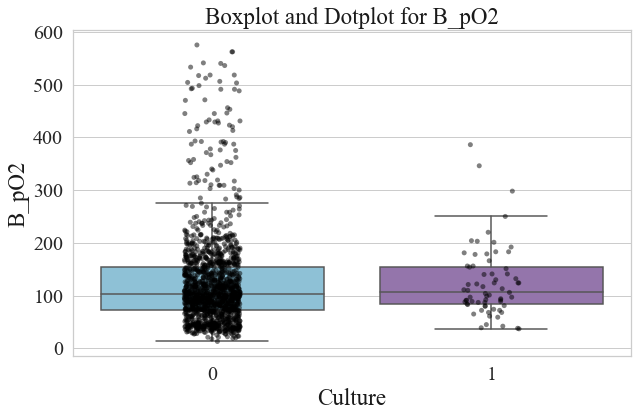

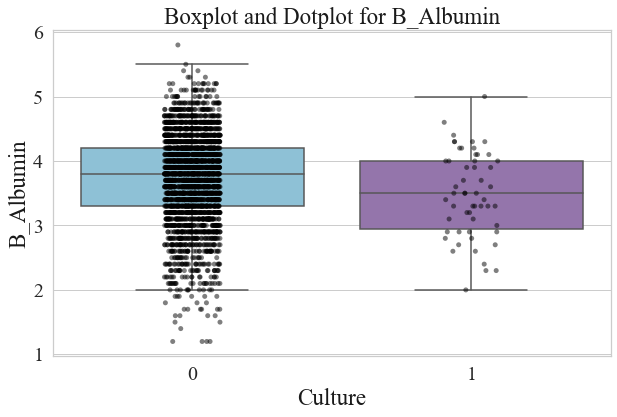

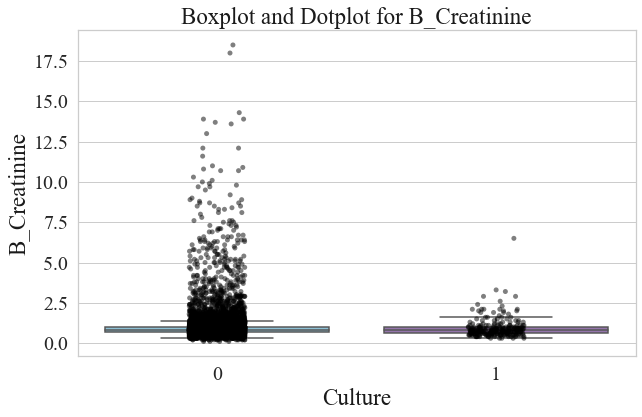

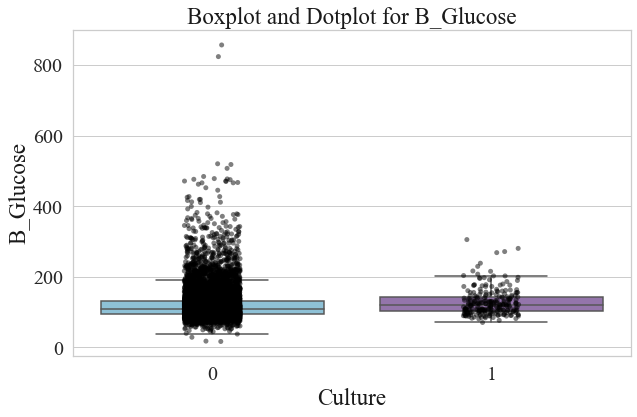

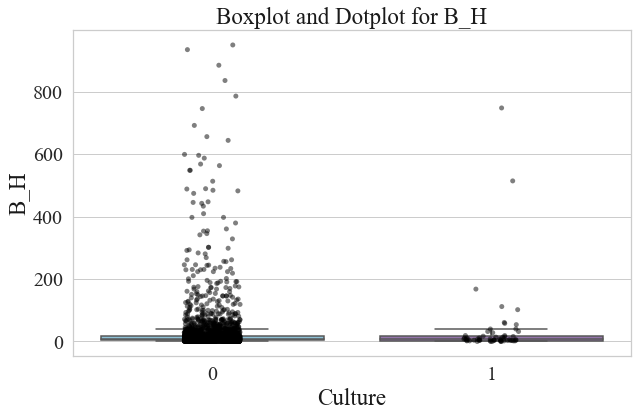

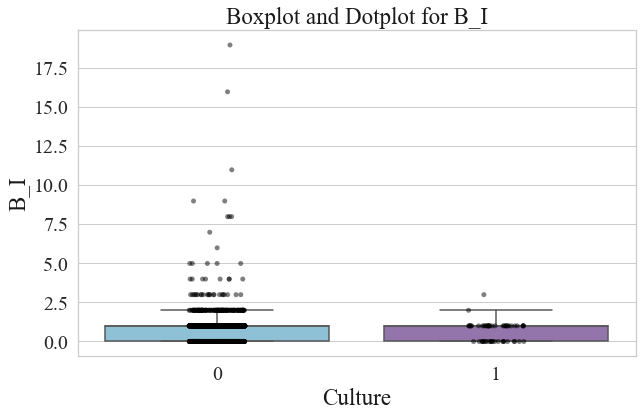

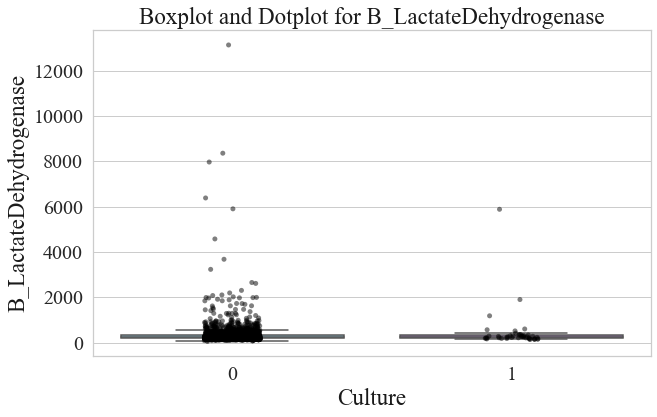

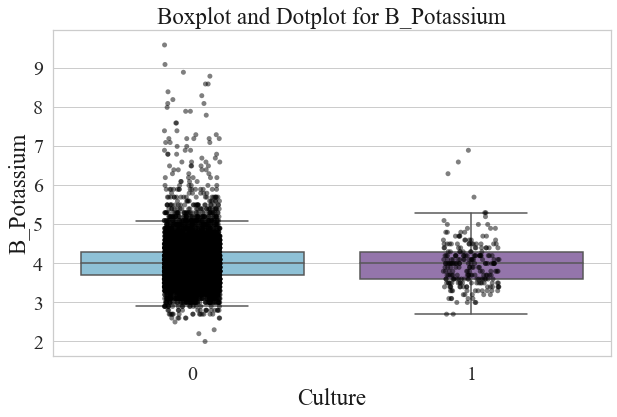

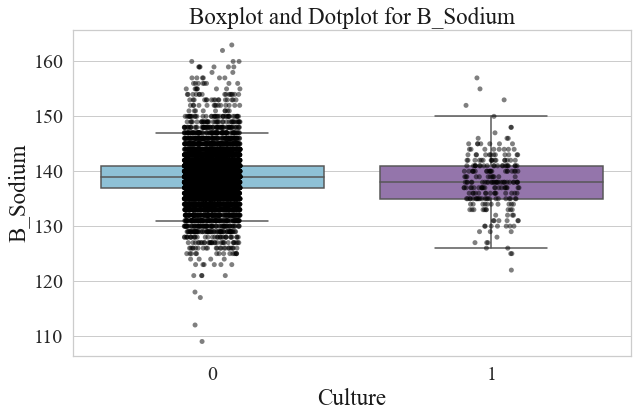

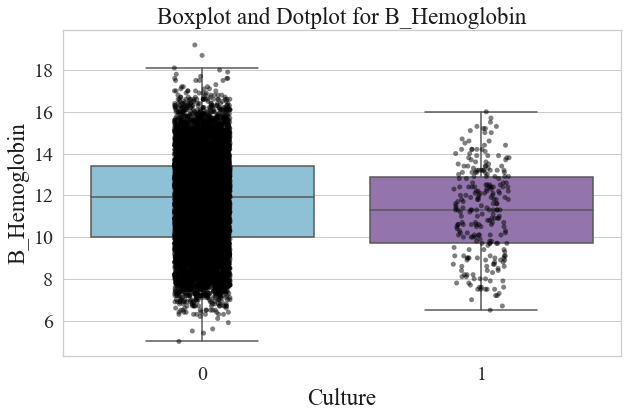

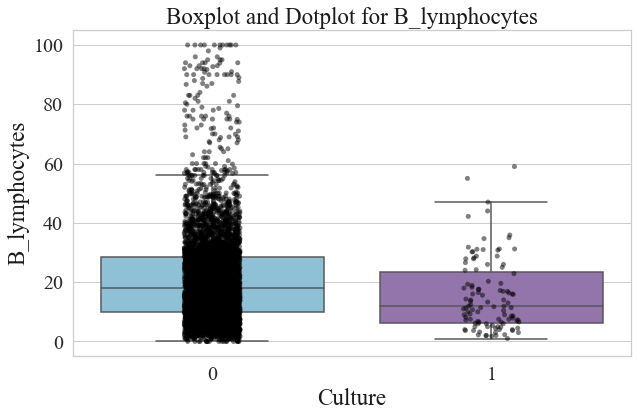

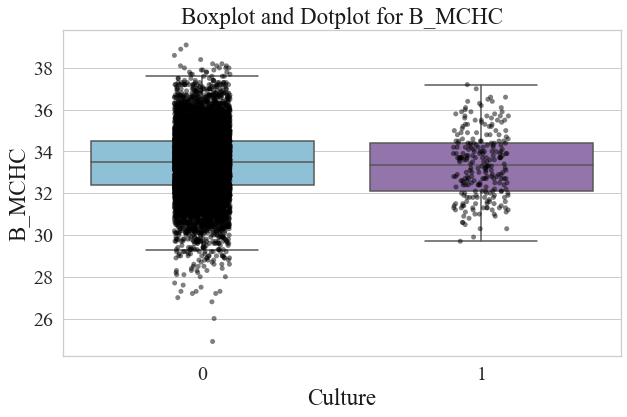

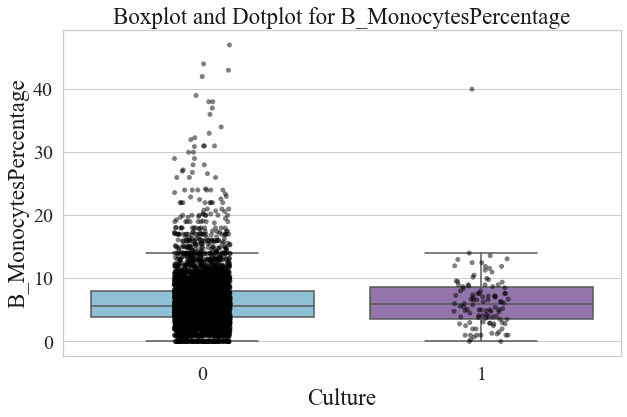

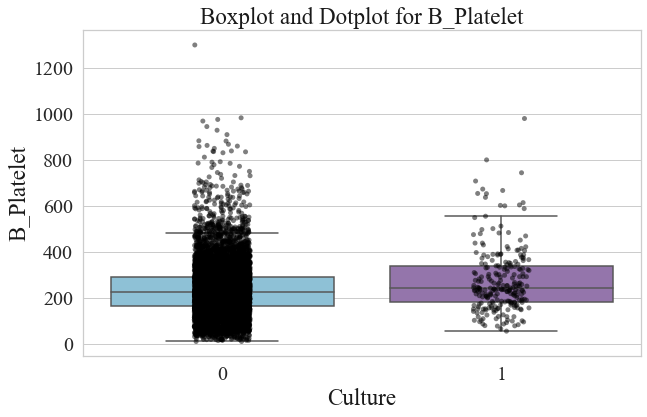

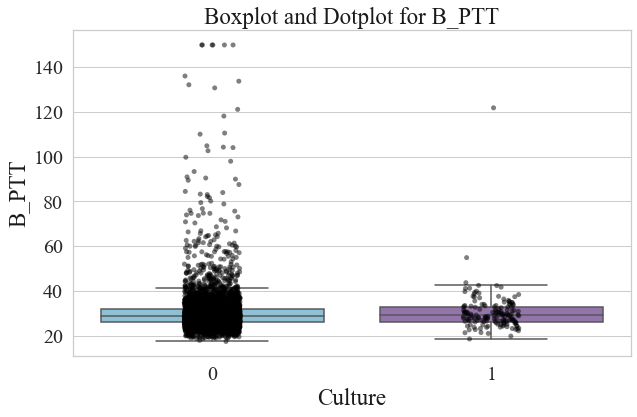

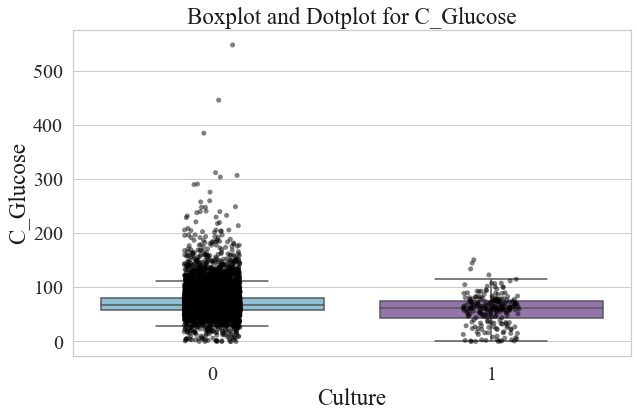

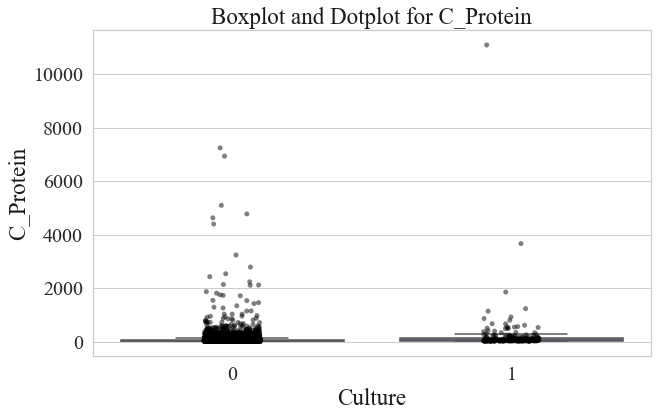

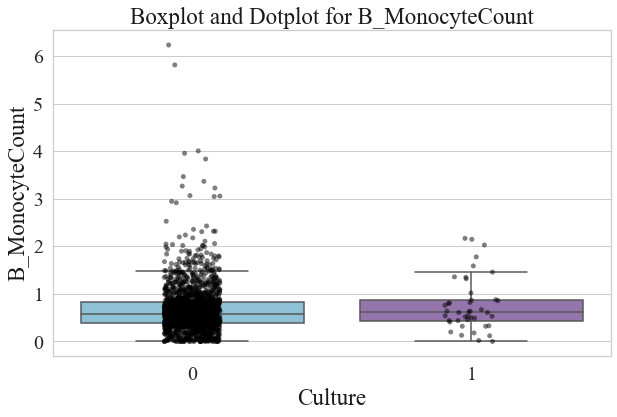

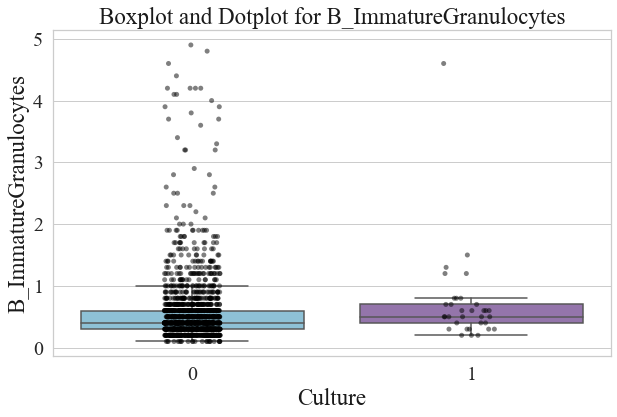

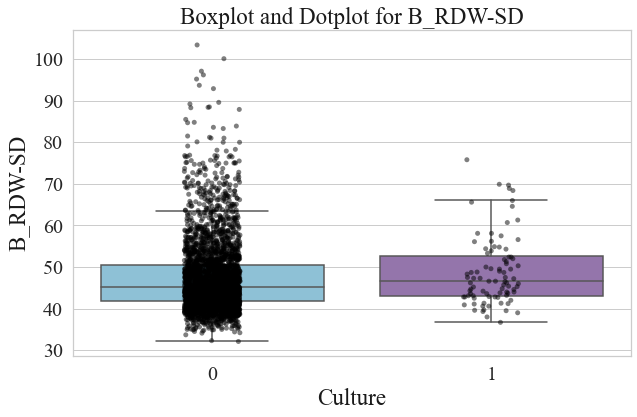

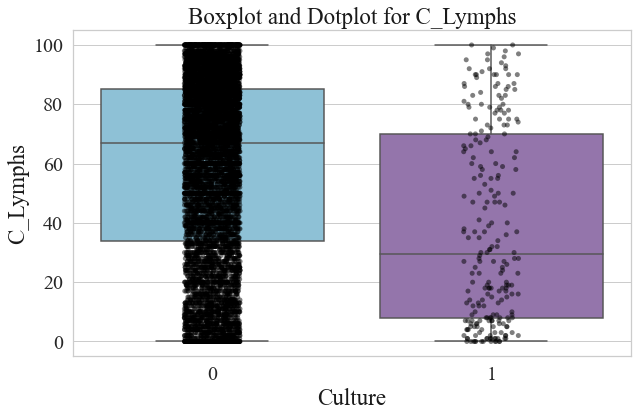

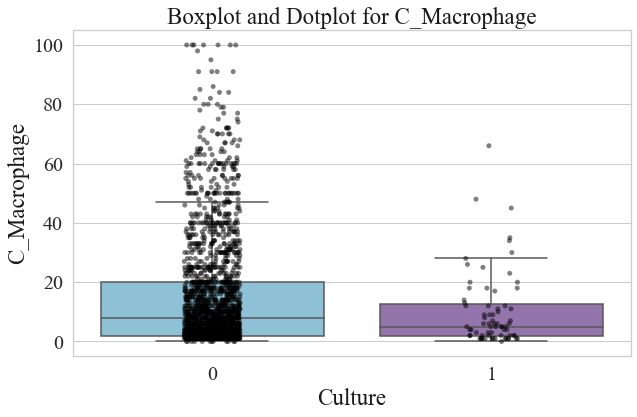

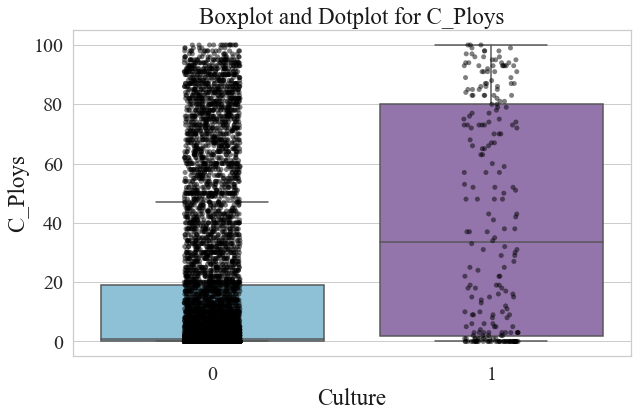

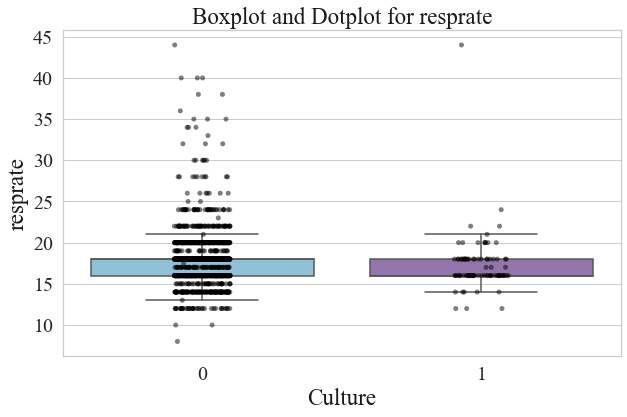

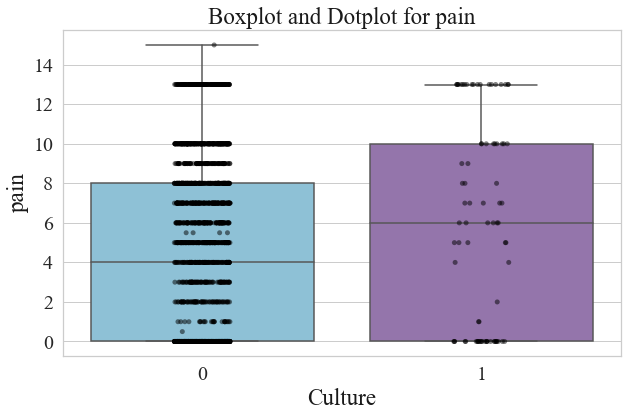

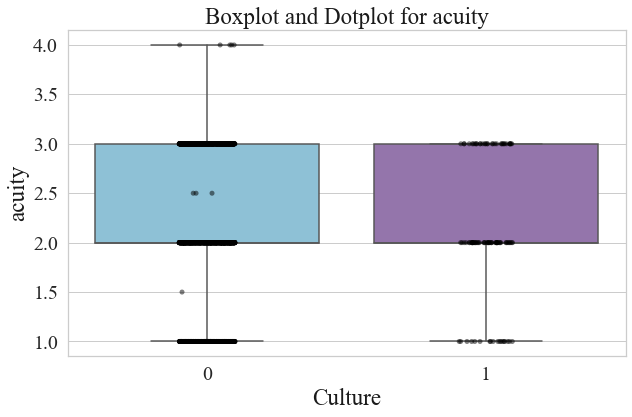

In [49]:
# 设置全局字体大小
# plt.rcParams.update({'font.size': 25})  # 设置全局字体大小为25

# 根据调色板选择颜色
colors = sns.color_palette("muted", n_colors=10)

for i in range(df_input.shape[1] - 1):
    features = df_input.columns.tolist()[i]
    grouped = df_input.groupby('culture')
    
    class_0 = grouped.get_group(0)[features].dropna()  # 删除空值
    class_1 = grouped.get_group(1)[features].dropna()  # 删除空值
    
    count_class_0 = class_0.count()
    count_class_1 = class_1.count()
    
    sns.set(style="whitegrid", palette="muted")
    plt.figure(figsize=(10, 6))
    
    # 绘制boxplot
    sns.boxplot(x='culture', y=features, data=df_input, palette=[colors[9], colors[4]], showfliers=False)
    
    # 绘制dotplot
    sns.stripplot(x='culture', y=features, data=df_input, jitter=True, dodge=True, marker='o', alpha=0.5, color='black', size=5)
    
    # 美化图表
    plt.title(f'Boxplot and Dotplot for {features}', fontdict=font, fontsize=23)  # 设置标题字体
    plt.xlabel('Culture', fontdict=font, fontsize=23)  # 设置X轴标签字体
    plt.ylabel(features, fontdict=font, fontsize=23)  # 设置Y轴标签字体
    
    # 设置坐标轴刻度字体
    plt.xticks(fontsize=20, fontname='Times New Roman')  # 设置X轴刻度字体
    plt.yticks(fontsize=20, fontname='Times New Roman')  # 设置Y轴刻度字体
    
    # 设置图例
#     handles, labels = plt.gca().get_legend_handles_labels()
#     labels = [f'class_0 (n={count_class_0})', f'class_1 (n={count_class_1})']
#     plt.legend(handles[:2], labels, loc='best', fontsize=20)  # 设置图例字体
    
    # 保存图片为高清格式
    lab_event_name = str(features).replace('<', '').replace('>', '').replace('/', '')
    filename = f"{lab_event_name}.png"
    # path = os.path.join("E:/CNSI_project/demo_and_data_5.0/Processed_data/MIMIC/pictures/All_features", filename)
    # plt.savefig(path, dpi=300, bbox_inches='tight')
    
    # 显示图表
    plt.show()
    
    # 关闭当前图形，防止重复绘制
    plt.close()

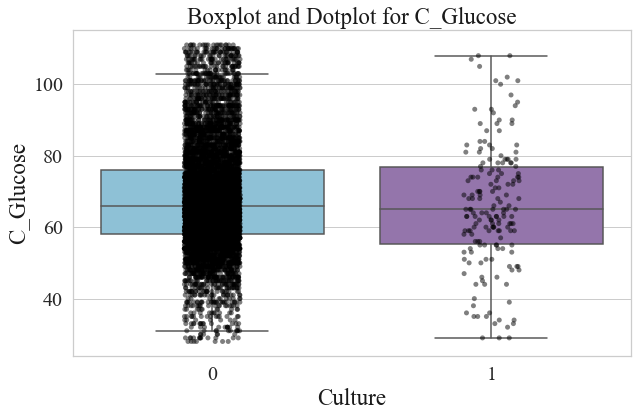

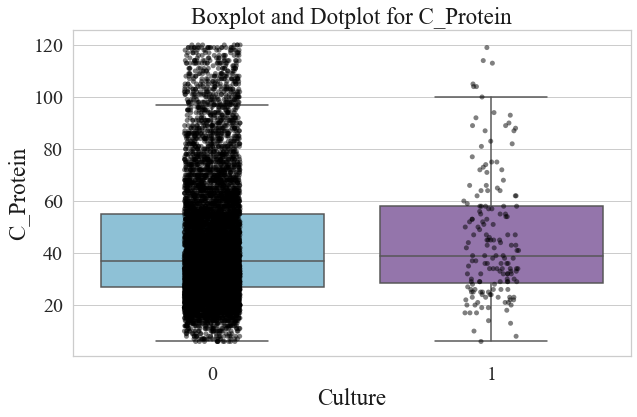

In [54]:
# 给C_Glucose和C_Protein处理异常值后再画图

# 定义一个函数来处理异常值
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

# 需要处理异常值的features
features_to_process = ['C_Glucose', 'C_Protein']

# 根据调色板选择颜色
colors = sns.color_palette("muted", n_colors=10)

for feature in features_to_process:
    # 处理异常值
    df_input_processed = remove_outliers(df_input, feature)
    
    grouped = df_input_processed.groupby('culture')
    
    class_0 = grouped.get_group(0)[feature].dropna()  # 删除空值
    class_1 = grouped.get_group(1)[feature].dropna()  # 删除空值
    
    count_class_0 = class_0.count()
    count_class_1 = class_1.count()
    
    sns.set(style="whitegrid", palette="muted")
    plt.figure(figsize=(10, 6))
    
    # 绘制boxplot
    sns.boxplot(x='culture', y=feature, data=df_input_processed, palette=[colors[9], colors[4]], showfliers=False)
    
    # 绘制dotplot
    sns.stripplot(x='culture', y=feature, data=df_input_processed, jitter=True, dodge=True, marker='o', alpha=0.5, color='black', size=5)
    
    # 美化图表
    plt.title(f'Boxplot and Dotplot for {feature}', fontdict=font, fontsize=23)  # 设置标题字体
    plt.xlabel('Culture', fontdict=font, fontsize=23)  # 设置X轴标签字体
    plt.ylabel(feature, fontdict=font, fontsize=23)  # 设置Y轴标签字体
    
    # 设置坐标轴刻度字体
    plt.xticks(fontsize=20, fontname='Times New Roman')  # 设置X轴刻度字体
    plt.yticks(fontsize=20, fontname='Times New Roman')  # 设置Y轴刻度字体
    
    # 设置图例
#     handles, labels = plt.gca().get_legend_handles_labels()
#     labels = [f'class_0 (n={count_class_0})', f'class_1 (n={count_class_1})']
#     plt.legend(handles[:2], labels, loc='best', fontsize=20)  # 设置图例字体
    
    # 保存图片为高清格式
    lab_event_name = str(feature).replace('<', '').replace('>', '').replace('/', '')
    filename = f"{lab_event_name}.png"
    # path = os.path.join("E:/CNSI_project/demo_and_data_5.0/Processed_data/MIMIC/pictures/All_features", filename)
    # plt.savefig(path, dpi=300, bbox_inches='tight')
    
    # 显示图表
    plt.show()
    
    # 关闭当前图形，防止重复绘制
    plt.close()

In [56]:
# 初始化一个空的DataFrame来存储结果
results = pd.DataFrame(columns=['Feature', 'Min', 'Max', 'Mean_0', 'Mean_1', 'Std_0', 'Std_1', 'Count_0', 'Count_1', 'P_value'])

# 遍历所有features列
for feature in df_input.columns[:-1]:  # 最后一列是标签，不需要遍历
    # 分别获取标签为0和1的样本
    group_0 = df_input[df_input['culture'] == 0][feature].dropna()
    group_1 = df_input[df_input['culture'] == 1][feature].dropna()
    
    # 计算非空数据的个数  
    count_0 = group_0.count()  
    count_1 = group_1.count()  
    
    # 计算均值和标准差
    mean_0 = group_0.mean()
    mean_1 = group_1.mean()
    std_0 = group_0.std()
    std_1 = group_1.std()
    
    # 计算取值范围
    min_value = df_input[feature].min()
    max_value = df_input[feature].max()
    
    # 计算p值（两样本t检验）
    _, p_value = stats.ttest_ind(group_0, group_1, nan_policy='omit')
    
    # 将结果添加到DataFrame中
    results = results.append({
        'Feature': feature,
        'Min': min_value,
        'Max': max_value,
        'Mean_0': mean_0,
        'Mean_1': mean_1,
        'Std_0': std_0,
        'Std_1': std_1,
        'Count_0': count_0,  # 添加非空数据个数  
        'Count_1': count_1,  # 添加非空数据个数 
        'P_value': p_value
    }, ignore_index=True)

# 保存结果到csv文件
results.to_csv('aim1_feature_distribution_and_p_values.csv', index=False)
results

,Feature,Min,Max,Mean_0,Mean_1,Std_0,Std_1,Count_0,Count_1,P_value
0,B_pO2,13.0,575.0,125.116134,125.208955,88.278682,67.915397,1438,67,0.993228
1,B_Albumin,1.2,5.8,3.733298,3.48,0.683222,0.6612,2802,55,0.006479
2,B_Creatinine,0.1,18.5,1.026949,0.921811,0.99211,0.621363,8913,243,0.100382
3,B_Glucose,17.0,858.0,122.109852,128.243802,48.290268,37.321115,8648,242,0.050067
4,B_H,0.0,951.0,27.698143,39.258621,75.093205,118.993522,2531,58,0.254225
5,B_I,0.0,19.0,0.856183,0.655172,0.883232,0.60847,2531,58,0.084878
6,B_LactateDehydrogenase,48.0,13130.0,331.031039,445.045455,486.708692,890.202249,2223,44,0.132317
7,B_Potassium,2.0,9.6,4.032391,3.974486,0.552854,0.588041,8839,243,0.107891
8,B_Sodium,109.0,163.0,138.947172,138.0,4.254016,5.110352,8840,243,0.000667
9,B_Hemoglobin,5.0,19.2,11.753992,11.219512,2.249614,2.138879,9018,246,0.000233


In [28]:
# delete the duplicate samples
# 这次提取出的数据集很厉害，没有一个重复的，冗余度非常低！
df_input = df_input.drop_duplicates(keep='first')
df_input

,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,B_lymphocytes,B_MCHC,B_MonocytesPercentage,B_Platelet,B_PTT,C_Glucose,C_Protein,B_MonocyteCount,B_ImmatureGranulocytes,B_RDW-SD,C_Lymphs,C_Macrophage,C_Ploys,resprate,pain,acuity,culture
0,NaN,NaN,0.7,92.0,NaN,NaN,NaN,3.7,144.0,11.7,21.9,33.0,3.8,226.0,27.5,55.0,29.0,NaN,NaN,NaN,100.0,NaN,0.0,NaN,NaN,NaN,0
1,NaN,3.6,0.6,95.0,NaN,NaN,187.0,3.7,137.0,12.6,11.2,34.3,5.9,198.0,NaN,61.0,24.0,NaN,NaN,NaN,43.0,2.0,17.0,NaN,NaN,NaN,0
2,NaN,2.6,1.2,76.0,NaN,NaN,NaN,4.9,137.0,9.7,NaN,30.8,NaN,557.0,NaN,61.0,75.0,NaN,NaN,NaN,41.0,49.0,10.0,16.0,13.0,2.0,0
3,NaN,NaN,0.8,105.0,NaN,NaN,NaN,3.9,142.0,15.3,26.1,34.9,4.0,256.0,NaN,60.0,72.0,NaN,NaN,NaN,62.0,NaN,0.0,NaN,NaN,NaN,0
4,NaN,4.9,1.0,111.0,12.0,2.0,NaN,4.6,128.0,8.4,6.6,27.2,7.7,225.0,NaN,57.0,100.0,0.77,0.4,45.3,96.0,NaN,1.0,19.0,9.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9307,NaN,NaN,0.8,155.0,NaN,NaN,NaN,3.6,137.0,11.6,13.0,36.0,8.5,257.0,NaN,70.0,295.0,NaN,NaN,NaN,0.0,NaN,100.0,NaN,NaN,NaN,0
9308,NaN,NaN,0.7,140.0,NaN,NaN,180.0,3.7,140.0,13.0,7.2,36.5,5.6,218.0,NaN,1.0,590.0,NaN,NaN,NaN,1.0,NaN,90.0,NaN,NaN,NaN,0
9309,NaN,2.3,0.7,53.0,NaN,NaN,NaN,3.8,135.0,10.7,24.3,32.3,6.6,377.0,27.2,42.0,44.0,NaN,NaN,NaN,88.0,NaN,8.0,NaN,NaN,NaN,0
9310,99.0,3.4,0.8,87.0,8.0,5.0,453.0,3.9,145.0,11.0,18.5,32.3,11.8,88.0,30.6,87.0,21.0,0.83,0.4,53.9,55.0,NaN,9.0,NaN,NaN,NaN,0


In [29]:
df_input.to_csv("E:/CNSI_project/demo_and_data_5.0/aim1_dataset_v2.1.csv",index=False)

In [30]:
df_input.describe()[["B_H", "B_I"]]

,B_H,B_I
count,2589.000000,2589.000000
mean,27.957126,0.851680
std,76.337406,0.878439
min,0.000000,0.000000
25%,4.000000,0.000000
50%,8.000000,1.000000
75%,18.000000,1.000000
max,951.000000,19.000000


In [32]:
df_input[["B_H", "B_I"]].dropna().describe()

,B_H,B_I
count,2589.000000,2589.000000
mean,27.957126,0.851680
std,76.337406,0.878439
min,0.000000,0.000000
25%,4.000000,0.000000
50%,8.000000,1.000000
75%,18.000000,1.000000
max,951.000000,19.000000


In [33]:
df_input[["B_H", "B_I"]].dropna().iloc[10:20]

,B_H,B_I
34,6.0,0.0
35,1.0,1.0
37,16.0,0.0
43,230.0,0.0
44,12.0,1.0
45,5.0,2.0
48,5.0,1.0
58,11.0,0.0
62,7.0,0.0
63,6.0,1.0


In [34]:
df_input[["B_H", "B_I"]].dropna()["B_H"].value_counts()[:30]

3.0     185
4.0     182
7.0     153
2.0     144
6.0     142
5.0     134
0.0     125
1.0     123
8.0     123
9.0     106
10.0     92
11.0     76
12.0     71
16.0     60
13.0     54
15.0     54
14.0     47
18.0     42
17.0     40
19.0     27
21.0     26
22.0     23
20.0     20
24.0     20
25.0     18
29.0     17
26.0     15
23.0     14
33.0     12
40.0     12
31.0     12
58.0     10
36.0     10
28.0     10
32.0     10
38.0      9
27.0      9
43.0      9
45.0      8
34.0      8
70.0      8
39.0      8
47.0      8
59.0      8
30.0      7
Name: B_H, dtype: int64

In [35]:
df_input[["B_H", "B_I"]].dropna()["B_I"].value_counts()

1.0     1718
0.0      695
2.0      130
3.0       23
4.0        8
5.0        5
8.0        3
9.0        2
7.0        1
19.0       1
6.0        1
11.0       1
16.0       1
Name: B_I, dtype: int64